# Homework 1: U.S. Boundary Currents

Name: Rilee Wadsworth

Date: 08/22/2025

#### Overview
In class, we examined the general structure of ocean circulation on large scales and saw that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_evel = xr.open_dataset('EVEL_2015_12.nc')
ds_nvel = xr.open_dataset('NVEL_2015_12.nc')

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_evel['EVEL'])
nvel = np.array(ds_nvel['NVEL'])
long = np.array(ds_evel['longitude'])
lat = np.array(ds_evel['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

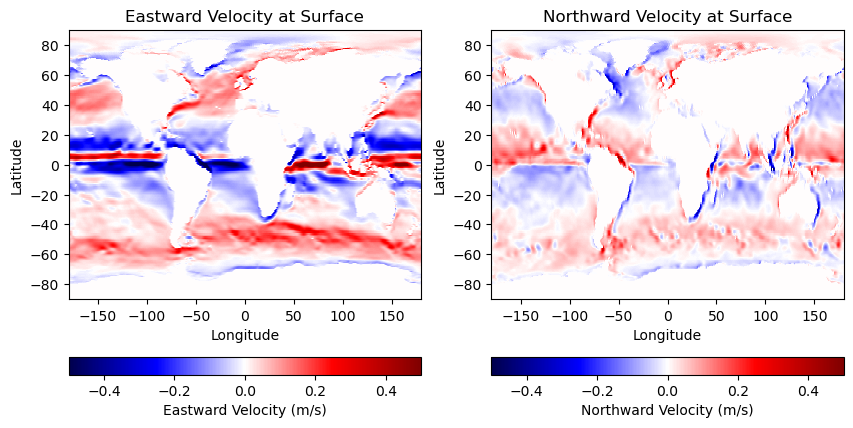

In [4]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
plt.pcolormesh(long, lat, evel[0, 0, :, :], vmin=-0.5, vmax=0.5, cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Eastward Velocity (m/s)', orientation='horizontal')
plt.title('Eastward Velocity at Surface', fontsize=12)
# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
plt.pcolormesh(long, lat, nvel[0, 0, :, :], vmin=-0.5, vmax=0.5, cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Northward Velocity (m/s)', orientation='horizontal')
plt.title('Northward Velocity at Surface', fontsize=12)

plt.show()

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

1. The surface currents at 30N on the east coast of the U.S. are moving northeast, wheras on the west coast the are moving south/slightly southwest. At 45N on the east coast of the U.S., the surface currents are moving slightly southwest, wheras on the west coast they are moving southeast.
2. The current flows faster on the east coast compared to the west coast.
3. In the northern hemisphere, gyres rotate clockwise. On the West Coast, we see southeast winds blowing along the California coast, and then moving westward around 20 N. This follows the same trend as we would expect from the North Pacific gyre. On the east coast, we see northeast winds blowing from Florida until it begins moving southesat along 40 N. Again, this observation follows what we would expect from the North Atlantic gyre. 

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [5]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [6]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

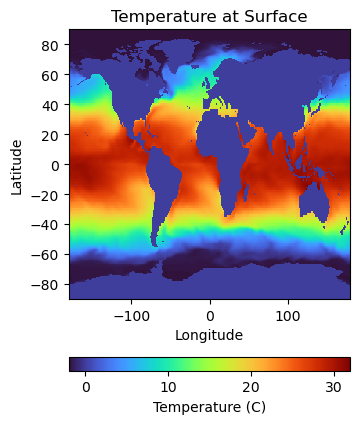

In [7]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
plt.pcolormesh(long, lat, theta[0, 0, :, :], vmin=-2, vmax=32, cmap='turbo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Temperature (C)', orientation='horizontal')
plt.title('Temperature at Surface', fontsize=12)

plt.show()


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

1. The temperature on the west coast of the U.S. is generally lower compared to the east coast. At around 35 N, temperature on the west coast is around 15 C, whereas it is around 25 C at the same latitude on the east coast.
2. The California current brings cold water from the North Pacific down along the California coast, which contributes to the cooler temperatures. Additionally, due to thermohaline circulation, cool water from the poles moves down towards the west coast. In contrast, the east coast typically has warmer temperatures due how the North Atlantic gyre circulates, water moves northward along the east coast bringing warm water up from the equator. 

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [8]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvelstr = xr.open_dataset('WVELSTAR_2015_12.nc')

In [9]:
# store the WVELSTAR grid into a into numpy array
wvelstr = np.array(ds_wvelstr['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [12]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
wvelstr = np.array(ds_wvelstr['WVELSTAR'])
ds_wvelstr

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, j: 360, k_l: 50, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    timestep   (time) int64 8B ...
    Zl         (k_l) float32 200B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 104MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      0.0
    date_created:                 Tue Aug 27 18:20:19 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [13]:
depth = np.array(ds_wvelstr['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

Text(0.5, 0, 'Longitude')

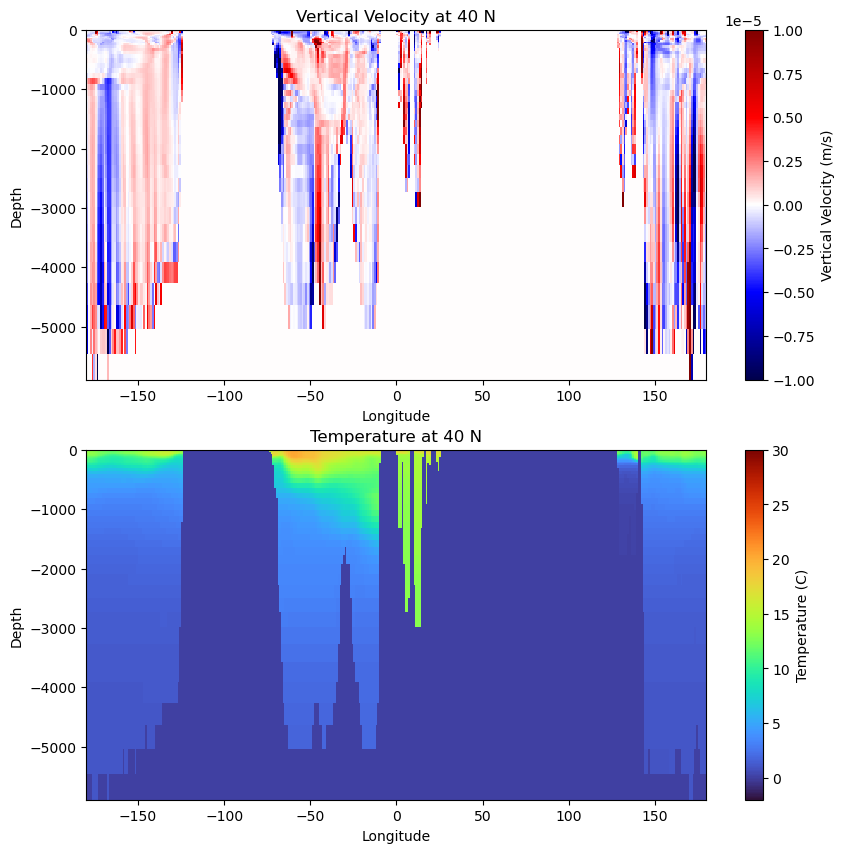

In [14]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
V = plt.pcolormesh(long,depth,wvelstr[0, :, 259, :], vmin = -0.00001, vmax=0.00001, cmap='seismic')
plt.colorbar(V, label='Vertical Velocity (m/s)' )
plt.title('Vertical Velocity at 40 N')
plt.ylabel('Depth')
plt.xlabel('Longitude');

# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
C = plt.pcolormesh(long,depth,theta[0, :, 259, :], vmin = -2, vmax=30, cmap='turbo')
plt.colorbar(C, label='Temperature (C)' )
plt.title('Temperature at 40 N')
plt.ylabel('Depth')
plt.xlabel('Longitude')


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. The vertical velocity in the current on the west coast seems move upward on the continental shelf, indicating that water is moving shallower in the water column. On the east coast, we see that the vertical velocity is negative, indicating water is being moved down into the water column.
2. The vertical velocity speed is much smaller compared to horizontal velocity. Horizontal velocity is in m/s, whereas the vertical velocity is near millimeter per second. Thus, the vertical velocity is much slower compared to horizontal winds. They are different because the ocean is strongly stratified, so water mass does not move quickly and takes much more force to move compared to horizontal motion. Additionally, horizontal velocities are driven by wind stress and pressure gradients (such as density gradients and sea surface slope), whereas vertical velocities are usually driven by upwelling/downwelling forces as well as eddies.
3. With water being moved upwards from depth on the west coast (shown by the vertical velocity on the west coast), this would bring cool waters up to the surface from depth, cooling the ocean surface on the west coast. Conversely, water is being pushed downard on the east coast, which moves warmer water down to depths. This movement of water masses cotnribute to the difference in surface temperature that we see.
4. As water moves southward along the U.S. west coast in the spring, the Earth's rotation causes that water to be pushed to the right due to the Corolis effect, moving surface water away from the continental coast, and causing water to move up in the water column down from depth, which would contribute to the vertical velocity identified in question 1. 